In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
barcolor = ['olivedrab', 'lightsteelblue', 'steelblue']
legend = ['Greedy', 'DDPG', 'TD3']

In [3]:
thres = 50

# Set A

In [4]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/DRL_allocation_for_user500_thres{thres}.csv')
data

,user,server,greedy_user,greedy_time,ddpg_user,ddpg_time,td3_user,td3_time
0,500.0,20.0,192.0,0.036360,203.0,0.006589,229.0,0.009425
1,500.0,20.0,182.0,0.034828,236.0,0.008567,251.0,0.008534
2,500.0,20.0,170.0,0.030716,205.0,0.007772,216.0,0.007491
3,500.0,20.0,198.0,0.034400,234.0,0.007560,269.0,0.006475
4,500.0,20.0,167.0,0.033924,211.0,0.007907,231.0,0.007967
...,...,...,...,...,...,...,...,...
195,500.0,80.0,433.0,0.112389,461.0,0.020355,464.0,0.021192
196,500.0,80.0,434.0,0.127531,456.0,0.021131,457.0,0.022505
197,500.0,80.0,437.0,0.115675,462.0,0.022717,466.0,0.023913
198,500.0,80.0,445.0,0.122932,464.0,0.019691,465.0,0.021732


In [5]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('server') #switch between user or server parameter
num_user = user_data.mean()[['greedy_user', 'ddpg_user', 'td3_user']]
num_user.index = num_user.index.astype(int) #change index to integer
time = user_data.mean()[['greedy_time', 'ddpg_time', 'td3_time']]
time.index = time.index.astype(int)

In [6]:
#compute the log of time for plotting
time[['greedy_time', 'ddpg_time', 'td3_time']] = time[['greedy_time', 'ddpg_time', 'td3_time']].applymap(lambda x: math.log10(100*x))

In [7]:
num_user

,greedy_user,ddpg_user,td3_user
server,,,
20,181.30,218.98,239.72
40,308.84,345.54,365.30
60,392.70,419.44,429.90
80,448.28,466.62,470.34


In [8]:
time

,greedy_time,ddpg_time,td3_time
server,,,
20,0.546018,-0.125381,-0.131415
40,0.817646,0.112917,0.114283
60,0.970829,0.246122,0.255883
80,1.099383,0.338236,0.369792


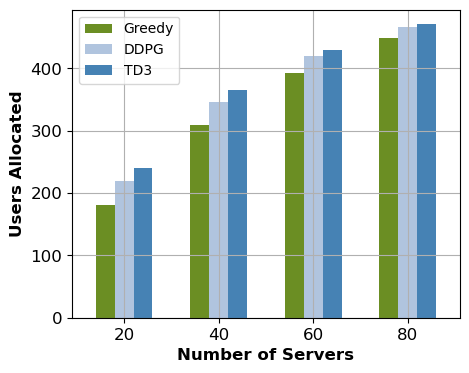

In [9]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

ax.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left')
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(5)
fig.set_figheight(4)

fig.savefig(f"plots/DRL_alloc_user_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

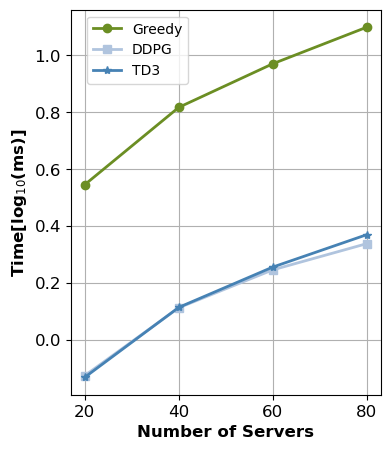

In [10]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size

plt.locator_params(axis='x', nbins=5)

ax1.plot( 'greedy_time', data=time, marker='o', linewidth=2, color=barcolor[0])
ax1.plot( 'ddpg_time', data=time, marker='s', linewidth=2, color = barcolor[1])
ax1.plot( 'td3_time', data=time, marker='*', linewidth=2, color=barcolor[2])

ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper right', bbox_to_anchor=(0.4, 1))
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

fig1.savefig(f"plots/DRL_alloc_time_u500_t{thres}.pdf",dpi=100, bbox_inches = "tight")

# Set B

In [11]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/DRL_allocation_for_server50_thres{thres}.csv')
data

,user,server,greedy_user,greedy_time,ddpg_user,ddpg_time,td3_user,td3_time
0,100.0,50.0,85.0,0.014817,85.0,0.011241,85.0,0.011451
1,100.0,50.0,84.0,0.014629,84.0,0.010887,84.0,0.011140
2,100.0,50.0,82.0,0.016529,82.0,0.012169,82.0,0.010456
3,100.0,50.0,83.0,0.013842,83.0,0.012603,83.0,0.011491
4,100.0,50.0,85.0,0.016296,85.0,0.014059,85.0,0.015284
...,...,...,...,...,...,...,...,...
245,500.0,50.0,366.0,0.072679,413.0,0.015943,436.0,0.014084
246,500.0,50.0,356.0,0.072729,400.0,0.013435,411.0,0.013961
247,500.0,50.0,360.0,0.074898,393.0,0.012517,405.0,0.015465
248,500.0,50.0,367.0,0.073587,388.0,0.037188,394.0,0.014841


In [12]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('user') #switch between user or server parameter
num_user = user_data.mean()[['greedy_user', 'ddpg_user', 'td3_user']]
num_user.index = num_user.index.astype(int)
time = user_data.mean()[['greedy_time', 'ddpg_time', 'td3_time']]
time.index = time.index.astype(int)

In [13]:
#compute the log of time for plotting
time[['greedy_time', 'ddpg_time', 'td3_time']] = time[['greedy_time', 'ddpg_time', 'td3_time']].applymap(lambda x: math.log10(100*x))

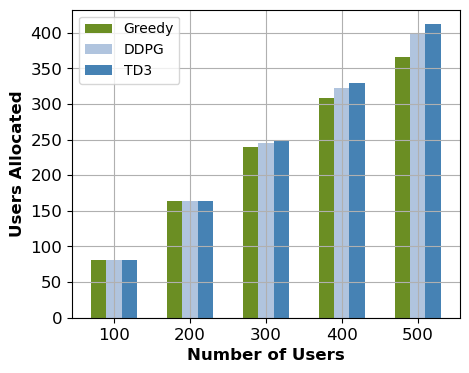

In [14]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")

ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left')
ax.grid(True)
plt.xticks(rotation=0)


fig.set_figwidth(5)
fig.set_figheight(4)

fig.savefig(f"plots/DRL_alloc_user_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")

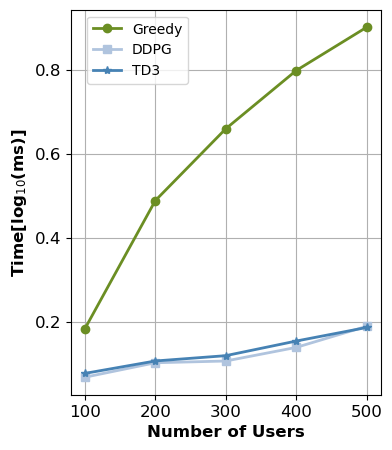

In [15]:
fig1, ax1 = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size


plt.locator_params(axis='x', nbins=5)

ax1.plot( 'greedy_time', data=time, marker='o', linewidth=2, color=barcolor[0])
ax1.plot( 'ddpg_time', data=time, marker='s', linewidth=2, color = barcolor[1])
ax1.plot( 'td3_time', data=time, marker='*', linewidth=2, color=barcolor[2])

ax1.set_ylabel('Time[log$_{10}$(ms)]', fontsize=12, fontweight="bold")
ax1.set_xlabel("Number of Users", fontsize=12, fontweight="bold")

ax1.tick_params(axis='both', labelsize=12)
ax1.legend(legend, loc='upper right', bbox_to_anchor=(0.4, 1))
ax1.grid(True)
plt.xticks(rotation = 0)

fig1.set_figwidth(4)
fig1.set_figheight(5)

fig1.savefig(f"plots/DRL_alloc_time_s50_t{thres}.pdf",dpi=100, bbox_inches = "tight")